In [3]:
!pip install pymc3
import pymc3 as pm
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats

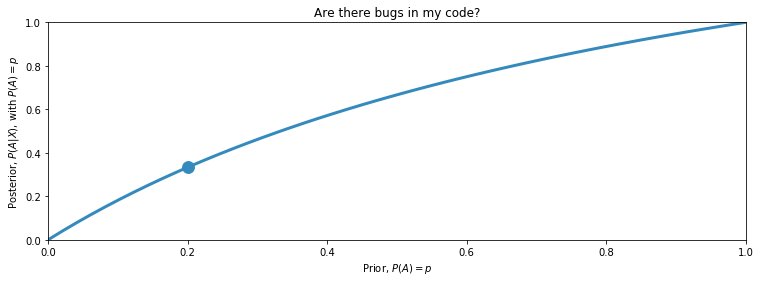

In [4]:
figsize(12.5, 4)
p = np.linspace(0, 1, 50)
plt.plot(p, 2*p/(1+p), color="#348ABD", lw=3)
#plt.fill_between(p, 2*p/(1+p), alpha=.5, facecolor=["#A60628"])
plt.scatter(0.2, 2*(0.2)/1.2, s=140, c="#348ABD")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Prior, $P(A) = p$")
plt.ylabel("Posterior, $P(A|X)$, with $P(A) = p$")
plt.title("Are there bugs in my code?");

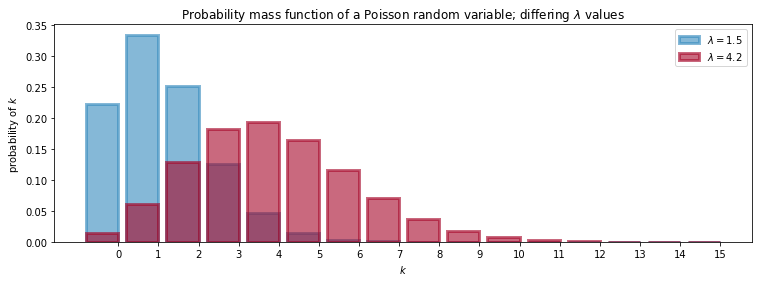

In [5]:
figsize(12.5, 4)
a = np.arange(16)
poi = stats.poisson
lambda_ = [1.5, 4.25]
colours = ["#348ABD", "#A60628"]

plt.bar(a, poi.pmf(a, lambda_[0]), color=colours[0],
        label="$\lambda = %.1f$" % lambda_[0], alpha=0.60,
        edgecolor=colours[0], lw="3")

plt.bar(a, poi.pmf(a, lambda_[1]), color=colours[1],
        label="$\lambda = %.1f$" % lambda_[1], alpha=0.60,
        edgecolor=colours[1], lw="3")

plt.xticks(a + 0.4, a)
plt.legend()
plt.ylabel("probability of $k$")
plt.xlabel("$k$")
plt.title("Probability mass function of a Poisson random variable; differing \
$\lambda$ values");

In [6]:
sum = 0 ;
for i in range(0, 16):
    sum = sum + i*poi.pmf(i, lambda_[0])
print(sum)

1.4999999998764042


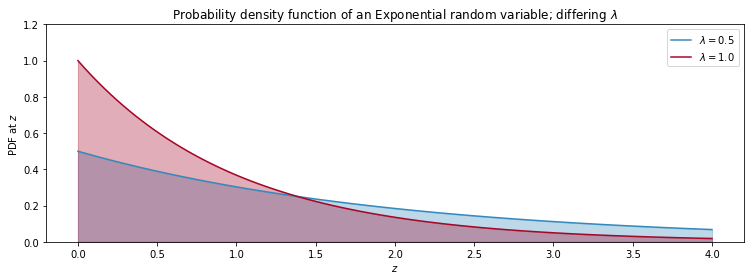

In [7]:
a = np.linspace(0, 4, 100)
expo = stats.expon
lambda_ = [0.5, 1]

for l, c in zip(lambda_, colours):
    plt.plot(a, expo.pdf(a, scale=1./l),
             color=c, label="$\lambda = %.1f$" % l)
    plt.fill_between(a, expo.pdf(a, scale=1./l), color=c, alpha=.33)

plt.legend()
plt.ylabel("PDF at $z$")
plt.xlabel("$z$")
plt.ylim(0,1.2)
plt.title("Probability density function of an Exponential random variable;\
 differing $\lambda$");

In [8]:
def density(z):
    return z*0.5*np.exp(-0.5*z)
from scipy.integrate import quad
expected_Value, err = quad(density,0, float("inf"))
print(expected_Value)

1.9999999999999998


Bây giờ hãy cùng xem qua ứng dụng Bayesian inference vào một ví dụ về số lượng tai nạn máy bay qua từng năm ở US (1908-2009).


In [18]:
import pandas as pd
df = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv")

df_Date = df['Date']
df_Accident = df['Aboard']

df_final = pd.concat([df_Date, df_Accident], axis = 1)

df_final.set_index('Date', inplace = True)
df_final.index = pd.to_datetime(df_final.index)
df_final["Date"] = df_final.index

In [19]:
df_final.dropna(how = "any", subset=['Aboard', 'Date'])

,Aboard,Date
Date,,
1908-09-17,2.0,1908-09-17
1912-07-12,5.0,1912-07-12
1913-08-06,1.0,1913-08-06
1913-09-09,20.0,1913-09-09
1913-10-17,30.0,1913-10-17
1915-03-05,41.0,1915-03-05
1915-09-03,19.0,1915-09-03
1916-07-28,20.0,1916-07-28
1916-09-24,22.0,1916-09-24


In [20]:
df_sorted = df_final.groupby(pd.Grouper(freq='Y')).sum()
df_sorted['Year'] = [i for i in range(1908, 2010)]

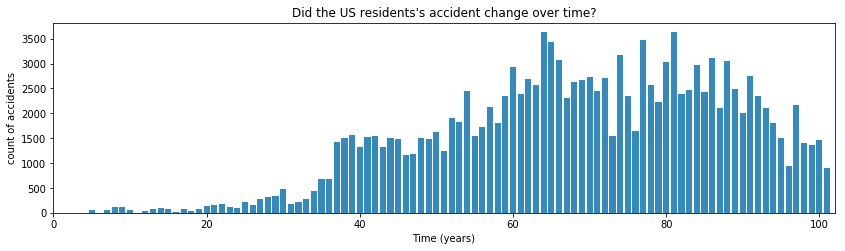

In [21]:
figsize(14.0, 3.5)
count_data = df_sorted['Aboard'] 
n_count_data = len(df_sorted)
plt.bar(np.arange(n_count_data), count_data, color="#348ABD")
plt.xlabel("Time (years)")
plt.ylabel("count of accidents")
plt.title("Did the US residents's accident change over time?")
plt.xlim(0, n_count_data);

Chart ở trên biểu thị cho số lượt tai nạn qua từng năm (mỗi năm tương ứng với một cột màu xanh). Nhiệm vụ của chúng ta là tìm xem liệu sự 
đổi trong số vụ tai nạn giao thông xảy ra theo một chiều hướng đồng đều (gradually) hay đột ngột(suddenly). 
Đầu tiên, dựa vào biểu đồ để đưa ra một vài nhận xét đầu tiên. Rõ ràng kể từ khoảng 40 trở đi, số lượng tai nạn xuất hiện một cách đáng kể, trong khi từ đó trở về trước số lượng cực ít, thậm chí là 0 ở những năm đầu 1908, 1909, 1910.  

Rồi, hãy xem xem model Bayesian của chúng ta hoạt động như thế nào với trường hợp này. Trong 3 loại distributions : mix (hỗn hợp), discrete(rời rạc), continuous (liên tục) thì discrete là phù hợp nhất trong 3. Rõ ràng theo Bayesian, để biểu thị được distribution, chúng ta cần tìm ra λ. Nếu nhìn vào probability mass function, xác suất tăng nếu λ tăng. Lại nhìn vào biểu đồ thì rõ ràng số lượng tai nạn thay đổi (tăng hoặc giảm) đột ngột tại một thời điểm nào đó, giả sử là năm τ. Đồng nghĩa với việc λ cũng thay đổi.   

Nhiệm vụ là cần tìm ra bộ 3 biến trên một cách tương đối. λ = λ1 (if t<τ) và λ2 (if t≥τ). Nếu λ1=λ2 đồng nghĩa với việc distribution không có một sự thay đổi đột ngột nào. 

Ngoài ra, xác suất để chọn ra τ là 1/n_count_data vì chúng ta chưa biết liệu đâu là năm khiến cho distribution thay đổi. 

In [22]:
import theano.tensor as tt
with pm.Model() as model:
    alpha = 1.0/count_data.mean()  # Recall count_data is the
                                   # variable that holds our txt counts
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data - 1) #Một ngày được lấy ngẫu nhiên từ 0 đến n_count_data

Trong đoạn code trên, chúng ta đơn thuần đang tạo ra 3 biến (variables) (lambda_1, lambda_2, tau) lần lượt đại diện cho (λ1,λ2,τ). Cả 3 biến đều được khởi tạo ngẫu nhiên (pm.Exponential() và pm.DiscreteUniform()) 

In [23]:
with model:
    idx = np.arange(n_count_data) # Index
    lambda_ = pm.math.switch(tau > idx, lambda_1, lambda_2)

Ở đây, chúng ta tạo ra một biến là lambda_ sử dụng switch() nhầm assign một trong 2 lambda_1 hoặc lambda_2 cho lambda_, phụ thuộc vào điều kiện với tau. 

In [24]:
with model:
    observation = pm.Poisson("obs", lambda_, observed=count_data)

Khởi tạo một biến observation bao gồm dữ liệu của chúng ta (count_data) với biến lambda_ thông qua keyword observed 

In [27]:
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step)

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [tau]
>Metropolis: [lambda_2]
>Metropolis: [lambda_1]
Sampling chain 1, 0 divergences: 100%|██████████| 15000/15000 [00:12<00:00, 1201.98it/s]
The number of effective samples is smaller than 25% for some parameters.


In [32]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

In [37]:
print(lambda_1_samples)
print(lambda_2_samples)
print(tau_samples)

[154.02855185 154.02855185 159.74103207 ... 156.62853792 156.62853792
 156.62853792]
[2139.4114467  2139.4114467  2147.15741762 ... 2132.4677698  2132.4677698
 2127.1280567 ]
[37 37 37 ... 37 37 37]


Từ đây chúng ta ước tính được rằng giá trị tau rơi vào ngày 37. Đối chiếu với biểu đồ, rõ ràng có sự thay đổi từ đây trở về trước (1908) 
và về sau (2009). Tương ứng với tau là 2 giá trị lambda_1 và lambda_2 = 15* , 213* ( * biến thiên từ 0 đến 9 )

Text(0.5, 0, '$\\lambda_2$ value')

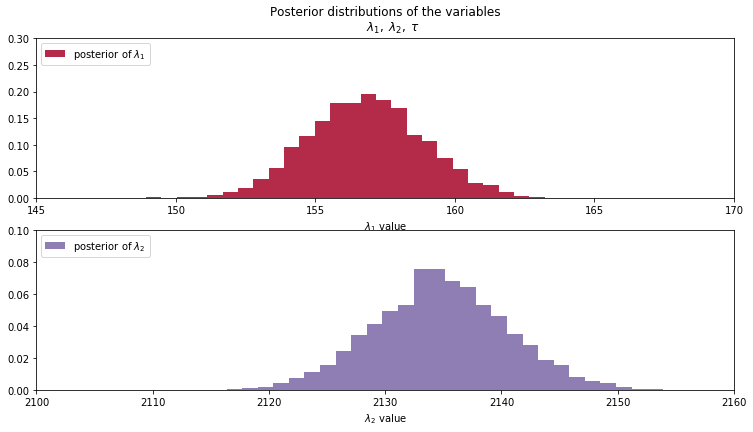

In [44]:
figsize(12.5, 10)
#histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.ylim([.0, .3])
plt.xlim([145, 170])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
plt.ylim([.0, .1])
plt.xlim([2100, 2160])
plt.xlabel("$\lambda_2$ value")

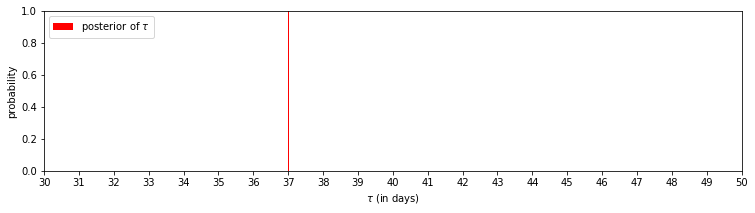

In [55]:
figsize(12.5, 10)
plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1, weights = w,
         label=r"posterior of $\tau$", histtype='stepfilled',
         color="r", rwidth=1.)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper left")
plt.ylim([0, 1.])
plt.xlim([30,50])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability");

Thử dựng histtype để lựa chọn một cách tương đối giá trị của các biến. Nhận thấy dữ liệu của chúng ta tương đối để nhận ra tau ~ 37. Dựa vào hai biểu đồ trên, chọn lambda_1 ~ 157 và lambda_2 ~ 2135. 

In [ ]:
figsize(12.5, 5)
# tau_samples, lambda_1_samples, lambda_2_samples contain
# N samples from the corresponding posterior distribution
N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data)
for day in range(0, n_count_data):
    # ix is a bool index of all tau samples corresponding to
    # the switchpoint occurring prior to value of 'day'
    ix = day < tau_samples
    expected_texts_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N


plt.plot(range(n_count_data), expected_texts_per_day, lw=4, color="#E24A33",
         label="expected number of text-messages received")
plt.xlim(0, n_count_data)
plt.xlabel("Day")
plt.ylabel("Expected # text-messages")
plt.title("Expected number of text-messages received")
plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color="#348ABD", alpha=0.65,
        label="observed texts per day")

plt.legend(loc="upper left");

Tương tự một dữ liệu khác mà chúng ta tự tạo ra. Dữ liệu tin nhắn người dùng biến thiên qua 80 ngày chẳng hạn. Đầu tiên, ngẫu nhiên chọn 
ra một giá trị tau là số tự nhiên (0,80). Khởi tạo ngẫu nhiên 2 giá trị lambda_1, lambda_2 

In [2]:
tau = np.random.randint(0, 80)
alpha = 1./20.
lambda_1, lambda_2 = np.random.exponential(scale=1/alpha, size=2)
data = np.r_[stats.poisson.rvs(mu=lambda_1, size=tau), stats.poisson.rvs(mu=lambda_2, size = 80 - tau)]

In ra 3 biến trên, ta có như sau: 

In [3]:
print(tau, lambda_1, lambda_2)

8 6.042170838049264 20.99092761289482


Plot chúng để xem phân bố dữ liệu như thế nào. Rõ ràng có sự thay đổi lớn từ tau trở về trước và sau. 

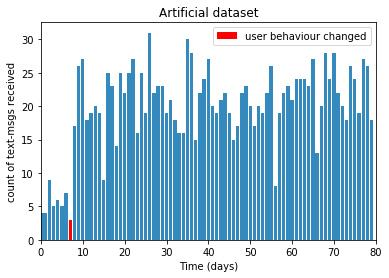

In [4]:
plt.bar(np.arange(80), data, color="#348ABD")
plt.bar(tau-1, data[tau - 1], color="r", label="user behaviour changed")
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Artificial dataset")
plt.xlim(0, 80)
plt.legend();

Plot xem probability distribution từ tau trở về trước, theo hàm poisson.  

In [ ]:
figsize(12.5, 4)
a = np.arange(8)
poi = stats.poisson
colours = "#348ABD"

plt.bar(a, poi.pmf(data[0:8], lambda_1), color=colours,
        label="$\lambda = %.1f$" % lambda_1, alpha=0.60,
        edgecolor=colours, lw="3")

plt.xticks(a + 0.2, a)
plt.legend()
plt.ylabel("probability of $k$")
plt.xlabel("$k$")
plt.title("HAHAHAHAHA")

Tiếp tục từ tau trở về sau 

Text(0.5, 1.0, 'HUHUHUHUHU')

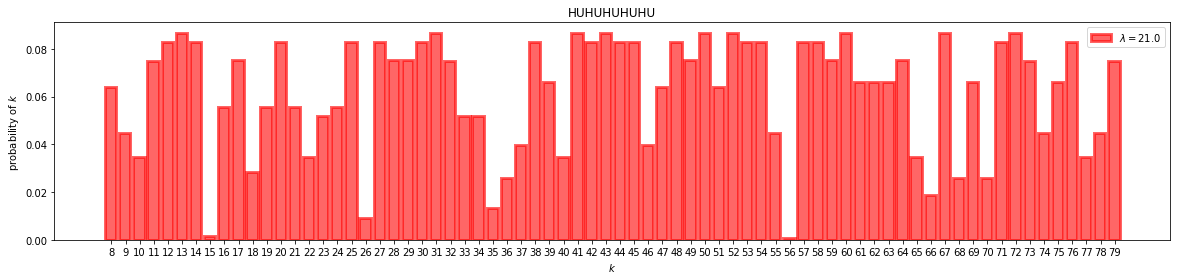

In [16]:
figsize(20, 4)
b = np.arange(8,80,1)
poi = stats.poisson

plt.bar(b, poi.pmf(data[8:80], lambda_2), color='r',
        label="$\lambda = %.1f$" % lambda_2, alpha=0.60,
        edgecolor='r', lw="3")

plt.xticks(b + 0.05, b)
plt.legend()
plt.ylabel("probability of $k$")
plt.xlabel("$k$")
plt.title("HUHUHUHUHU")

Thử đi qua ví dụ A/B Testing. Bài toán được diễn giải như sau:

A/B testing là mẫu thống kê nhằm phân định tính hiệu quả giữa 2 phương thức khác nhau. Ví dụ, một công ty dược phẩm kiểm định chất lượng thuốc giữa 2 sản phẩm A và B, họ sẽ test sản phẩm A qua một số lượt trials nào đó và test sản phẩm B, thường là 1/2 trials của A, nhưng một điều nên nhớ là theo Bayesian Modeling, điều này không ảnh hưởng đến kết quả test, chúng ta sẽ tìm hiểu sau. Sau khi test, bộ phận test sẽ được nhưng số liệu sang bộ phận statistician để phân tích và đưa ra kết quả loại nào tốt hơn

Tương tự, một front-end developer muốn biết xem mẫu thiết kế nào sẽ thu được nhiều lợi nhuận hơn. Người đó sẽ đo số lượng người tiếp cận A và B, rồi lưu lại sale hay không. Cuối cùng là phân tích 2 mẫu. 

Thử đi vào một trường hợp đơn giản (trường hợp 2) :

Giả sử rằng pA là xác suất thực (0<pA<1) mà người dùng ghé thăm site A và site A có lợi nhuận từ đó. Rõ ràng là chúng ta chưa hề biết pA là bao nhiêu. 

Giả sử có N người tiếp cận A, có chỉ có lợi nhuận từ n người. Nếu theo bình thường thì xác suất thu lợi nhuận từ n người trên N người ghé site A là pA = n/N. Trong thực tế thì điều này không hẳn chính xác. Observed frequency n/N, khác với true frequency (expected frequency) là cái mà chúng ta đang tìm kiếm. True frequency có thể được hiểu như là xác suất của một sự kiện đang diễn ra. True frequency là tung một con xúc xắc để ra mặt 1 là 1/6 trong khi observed frequency là tung 100 lần và cho ra 20 lần mặt 1, xác suất là 20/100 = 0.2 . Biết được true frequency của những sự kiện như:

Lượng người make purchase
Phần trăm các thuộc tính xã hội
Phần trăm người dùng có mèo ?! etc,... 

là những điều chúng ta CẦN, nhưng thường không xuất hiện, và chúng ta phải tự suy diễn ra từ lượng data mình có. 

Sử dụng thống kê Bayesian có thể suy ra được giá trị phù hợp của true frequency dựa trên prior distribution và data của mình. 
Tương ứng với A, B lần lượt assign cho chúng là N_A, N_B là số lượt trials quan sát, và n_A, n_B là số lượt thu lợi nhuận được. 
Để sử dụng được Bayesian model, chúng ta cần assign prior distribution cho những đại lượng chưa biết. Hãy giả sử pA là uniform trên [0,1]
(do chưa có strong belief nào về p_A dựa vào thực tế). p_True = 0.05 , N_A = 1500, N_B = 750. 

In [5]:
with pm.Model() as model:
    p_A = pm.Uniform('p_A', lower=0, upper=1)
    p_B = pm.Uniform('p_B', lower=0, upper=1)
print(p_A.tag.test_value)
print(p_B.tag.test_value)

0.5
0.5


In [18]:
p_True_A = 0.05  # remember, this is unknown.
p_True_B = 0.03
N_A = 1500
N_B = 750
# sample N Bernoulli random variables from Ber(0.05).
# each random variable has a 0.05 chance of being a 1.
# this is the data-generation step
occurrences_A = stats.bernoulli.rvs(p_True_A, size=N_A)
occurrences_B = stats.bernoulli.rvs(p_True_B, size=N_B)
print(occurrences_A) # Remember: Python treats True == 1, and False == 0
print(occurrences_B)
print(occurrences_A.sum(), occurrences_B.sum())

[0 0 0 ... 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 

In [21]:
print(occurrences_A.sum()/N_A)
print(occurrences_B.sum()/N_B)

0.046
0.037333333333333336


Both are approximately p_True_A and p_True_B ~ 0.05 and 0.03

In [41]:
with model:
    obs_A = pm.Bernoulli("_obs_A", p_A, observed=occurrences_A)
    obs_B = pm.Bernoulli("_obs_B", p_B, observed=occurrences_B)
    delta = pm.Deterministic("_delta_", p_A - p_B)
    step = pm.Metropolis()
    trace = pm.sample(18000, step=step)
    burned_trace = trace[1000:]    

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]
Sampling chain 1, 0 divergences: 100%|██████████| 18500/18500 [00:18<00:00, 1005.34it/s]
The number of effective samples is smaller than 10% for some parameters.


In [42]:
with model:
    p_A_samples = burned_trace["p_A"]
    p_B_samples = burned_trace["p_B"]
    delta_samples = burned_trace["_delta_"]

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


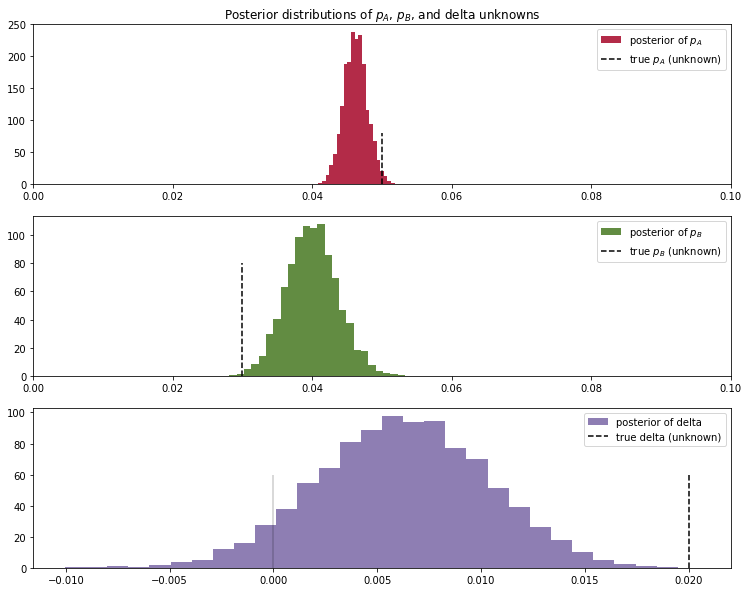

In [43]:
figsize(12.5, 10)

#histogram of posteriors

ax = plt.subplot(311)

plt.xlim(0, .1)
plt.hist(p_A_samples, histtype='stepfilled', bins=25, alpha=0.85,
         label="posterior of $p_A$", color="#A60628", normed=True)
plt.vlines(p_True_A, 0, 80, linestyle="--", label="true $p_A$ (unknown)")
plt.legend(loc="upper right")
plt.title("Posterior distributions of $p_A$, $p_B$, and delta unknowns")

ax = plt.subplot(312)

plt.xlim(0, .1)
plt.hist(p_B_samples, histtype='stepfilled', bins=25, alpha=0.85,
         label="posterior of $p_B$", color="#467821", normed=True)
plt.vlines(p_True_B, 0, 80, linestyle="--", label="true $p_B$ (unknown)")
plt.legend(loc="upper right")

ax = plt.subplot(313)
plt.hist(delta_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of delta", color="#7A68A6", normed=True)
plt.vlines(p_True_A - p_True_B, 0, 60, linestyle="--",
           label="true delta (unknown)")
plt.vlines(0, 0, 60, color="black", alpha=0.2)
plt.legend(loc="upper right");

- Rõ ràng nếu dựa trên hai biểu đồ trên, giá trị p_True_A và p_True_B còn cách biệt so với p_True_A_1 ~ 0.045 và p_True_B_1 ~ 0.4
- Nhìn vào biểu đồ posterior distribution of delta để thấy được đại đa số giá trị delta đều có xác suất > 0, nghĩa là performance của A > B
- Thử các giá trị khác nhau của p_True_A, p_True_B, N_A, N_B để thấy có được một cái nhìn khách quan và lựa chọn chính xác. 